### Netflix 분석

- Process


- 1. flixpatrol 사이트에서 데이터 수집
    - https://flixpatrol.com/top10/netflix/world/2021/full/#netflix-1


- 2. kaggle에서 netflix 컨텐츠 데이터 수집
    - https://www.kaggle.com/shivamb/netflix-shows
    
- 3. netflix original 데이터 수집
    -  https://www.netflix.com/kr/browse/genre/839338

#### 1. flixpatrol 사이트에서 데이터 수집

In [128]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import rc
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')
import time 
from tqdm import trange, notebook 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

In [3]:
url = "https://flixpatrol.com/top10/netflix/world/2021/full/"

In [4]:
response = requests.get(url)
response

<Response [200]>

In [5]:
dom = BeautifulSoup(response.text,'html.parser')

In [6]:
elements = dom.select("#netflix-1 > div.-mx-content > div > div > table > tbody > tr")

In [7]:
elements[0]

<tr class="table-group">
<td class="table-td w-12 font-semibold text-right text-gray-500 table-hover:text-gray-400">1.</td>
<td class="table-td w-10">
<span class="inline-block align-bottom w-6 h-6 rounded-full text-blue-100 bg-blue-600 text-xxs leading-6 text-center">n/a</span>
</td>
<td class="table-td">
<a class="hover:underline" href="/title/red-notice/">Red Notice</a>
<span class="inline-block align-baseline w-3 h-3" title="This title is Netflix original">
<svg viewbox="0 0 512 512"><path d="M304 0h96v512h-96zM112 0h96v512h-96z" fill="#b20710"></path><path d="M400 512h-96L112 0h96z" fill="#e50914"></path></svg>
</span> </td>
<td class="table-td w-12 text-right text-gray-400 font-semibold">25,918</td>
<td class="table-td w-18 text-right text-gray-500 table-hover:text-gray-400">–</td>
<td class="table-td w-12 text-right text-gray-400 font-semibold">90</td>
<td class="table-td w-16 text-right text-gray-500 table-hover:text-gray-400">288</td>
<td class="table-td w-12 text-right text-g

In [11]:
from fake_useragent import UserAgent

ua = UserAgent()

In [16]:
def connect(link):
    headers = {'User-Agent' : ua.random}
    response = requests.get(link,headers=headers)
    dom = BeautifulSoup(response.text,'html.parser')
    return dom
    

In [17]:
movie = []
for element in notebook.tqdm(elements):
    name = element.select_one("a").text
    link = "https://flixpatrol.com" + element.select_one("a").get("href")
    points = element.select("td:nth-child(4)")[0].text
    countries = element.select("td:nth-child(6)")[0].text
    days = element.select("td:nth-child(8)")[0].text
    
    time.sleep(1)
    dom = connect(link)
    c
    detail = dom.select_one("body > div.content.mt-4 > div > div.flex-grow > div.mb-6 > div.flex.flex-wrap.text-gray-500 > div")
    country = detail.select_one("span:nth-child(3)").text
    if detail.select_one("span:nth-child(9)") is not None:
        genre = detail.select_one("span:nth-child(9)").text
    date = detail.select_one("span:nth-child(5)").text
    rating = dom.select_one(" body > div.content.mt-4 > div > div.flex-grow > div.lg\:flex.lg\:space-x-8.justify-between > div:nth-child(1) > div.flex.flex-wrap.justify-around.text-center > div.px-2.py-4.w-32 > div.mb-1.text-2xl.text-gray-400").text
    time.sleep(1)
    
    dom2 = connect(link+"top10/")
    popular_c = dom2.select_one("#toc-netflix-1 > div:nth-child(2) > table > tbody > tr:nth-child(1) > td.table-td.w-2\/5 > a").text
    movie.append({"name":name,
                  "points": points,
                  "country":country,
                  "genre":genre,
                  "date":date,
                  "countries":countries,
                  "days":days,
                  "rating":rating,
                  "popular_country":popular_c,
                 })

movie_df = pd.DataFrame(movie)
movie_df.head(30)

  0%|          | 0/176 [00:00<?, ?it/s]

,name,points,country,genre,date,countries,days,rating,popular_country
0,Red Notice,"25,918",United States,Action,11/12/2021,90,48,6.5/10,Argentina
1,We Can Be Heroes,"25,311",United States,Adventure,12/25/2020,82,214,4.9/10,Argentina
2,Army of the Dead,"18,888",United States,Action,05/14/2021,89,92,6.3/10,Argentina
3,Wish Dragon,"16,953",China,Animated,06/11/2021,82,88,–,Argentina
4,Army of Thieves,"15,081",Germany,Action,10/29/2021,90,52,6.4/10,Argentina
5,The Mitchells vs. The Machines,"14,902",United States,Animated,04/30/2021,82,74,8.4/10,Argentina
6,Fatherhood,"14,660",United States,Comedy,06/18/2021,82,54,6.8/10,Argentina
7,The Unforgivable,"13,458",United States,Drama,12/10/2021,89,20,7.2/10,Argentina
8,The Guilty,"12,930",United States,Crime,10/01/2021,83,43,6.3/10,Argentina
9,Yes Day,"12,809",United States,Comedy,03/12/2021,81,66,–,Argentina


In [18]:
movie_df.to_csv("netflix.csv")

#### 2. kaggle에서 netflix 컨텐츠 데이터 수집

In [122]:
net = pd.read_csv("netflix_titles.csv")

In [123]:
net.shape

(8807, 12)

In [124]:
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [125]:
ratings_ages = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}
net["rating"] = net["rating"].map(ratings_ages)

In [103]:
net["rating"].head()

0     Teens
1    Adults
2    Adults
3    Adults
4    Adults
Name: rating, dtype: object

In [104]:
net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [105]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


3. 넷플릭스 오리지널 데이터 수집

In [52]:
url = "https://www.netflix.com/kr/browse/genre/839338"

In [53]:
response = requests.get(url)
response

<Response [200]>

In [54]:
dom = BeautifulSoup(response.text,'html.parser')

In [55]:
elements = dom.select_one("#appMountPoint > div > div.nm-collections-page > main >section>.nm-content-horizontal-row")

In [56]:
movies = elements.select("a")

In [57]:
netflix_original = []
for movie in  notebook.tqdm(movies):
    link = movie.get("href")
    response_detail = requests.get(link)
    dom2 = BeautifulSoup(response_detail.text,'html.parser')
    detail1 = dom2.select_one("#section-hero > div.hero-container > div.info-container > div.details-container > div > div.title-info-metadata-wrapper")
    year = detail1.select_one("span").text
    maturity_number= detail1.select_one(".maturity-number").text
    if detail1.select_one("a") is not None:
        main_genre = detail1.select_one("a").text
    netflix_original.append({"name":movie.select_one(".nm-collections-title-name").text,
                      "year": year,
                      "maturity_number":maturity_number,
                      "main_genre":main_genre})

net_original = pd.DataFrame(netflix_original)
net_original.head(30)

  0%|          | 0/75 [00:00<?, ?it/s]

,name,year,maturity_number,main_genre
0,지금 우리 학교는,2022,청불,청소년 시리즈
1,오징어 게임,2021,청불,스릴러 시리즈
2,D.P.,2021,15+,드라마
3,애나 만들기,2022,청불,미국 TV 프로그램
4,빨간 머리 앤,2017,12+,시대물
5,마이 네임,2021,청불,스릴러 시리즈
6,킹덤,2019,청불,시대물
7,금붕어 아내,2022,청불,로맨틱한 드라마
8,로스트 인 스페이스,2018,12+,미국 TV 프로그램
9,위쳐,2019,청불,판타지 시리즈


In [59]:
net_original.to_csv("netflix_korea.csv")

#### EDA의 수행 절차
- 데이터 수집
- 결측 데이터의 처리
- 데이터 탐색
    - 수집한 데이터에서 자유롭게 주제를 선정하여 데이터 분석을 통한 인사이트 도출
    - 예시 : 인도영화는 다른 국가보다 러닝타임이 길것이다. 컨텐츠의 퀄리티가 가장 좋은 국가는?

In [113]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [114]:
net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<AxesSubplot:>

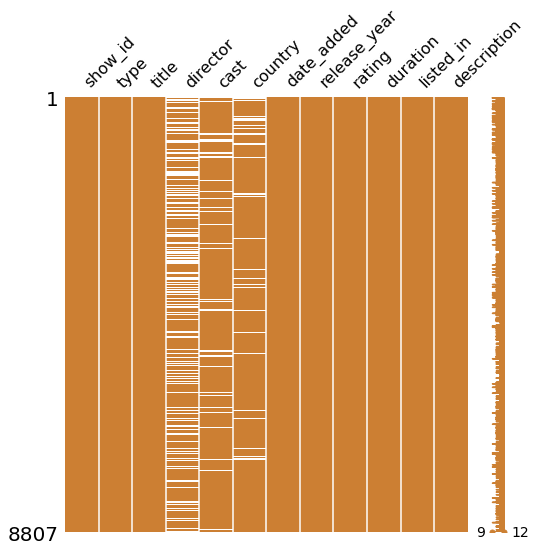

In [112]:
msno.matrix(df=net.iloc[:,:],figsize = (8,8),color = (0.8,0.5,0.2))

<AxesSubplot:>

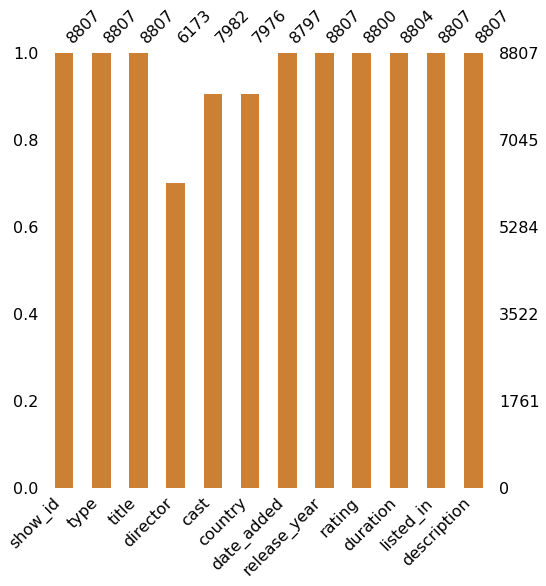

In [115]:
msno.bar(df=net.iloc[:,:],figsize = (8,8),color = (0.8,0.5,0.2))

In [129]:
net.rename(columns = {"listed_in":"genres"},inplace= True)
net.columns

genres = ", ".join(net['genres']).split(", ")
genres

genre_cnt = Counter()
for genre in genres:
    genre_cnt[genre] += 1

top_20_genre = genre_cnt.most_common(20)
netflix_genres = pd.DataFrame (top_20_genre, columns = ['Genres','Genres Count'])
netflix_genres.head()

,Genres,Genres Count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


<AxesSubplot:xlabel='Genres', ylabel='Genres Count'>

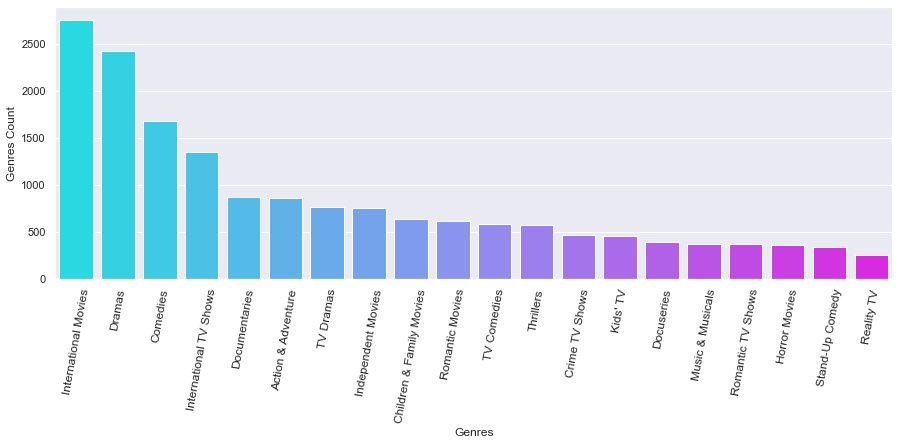

In [137]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "darkgrid")
plt.ylabel('"Count of Movies & TV shows by genres', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)
sns.barplot(x='Genres',y='Genres Count',data=netflix_genres,palette="cool")

<AxesSubplot:>

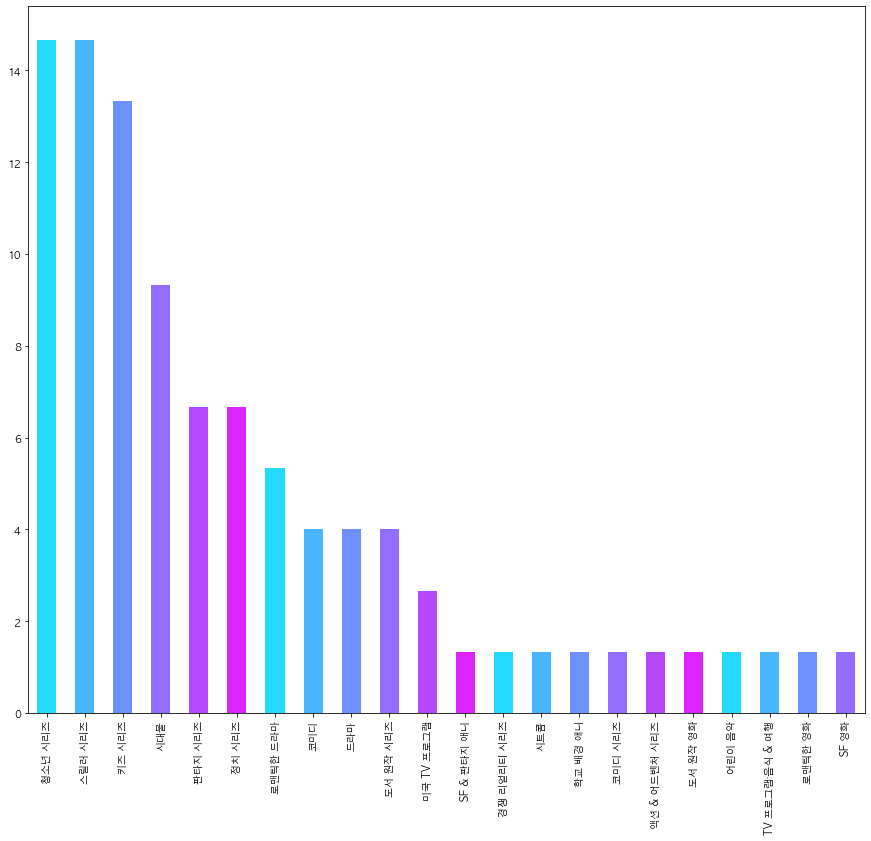

In [110]:
rc('font', family='AppleGothic') 
(net_original['main_genre'].value_counts(normalize=True)*100).plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

<AxesSubplot:>

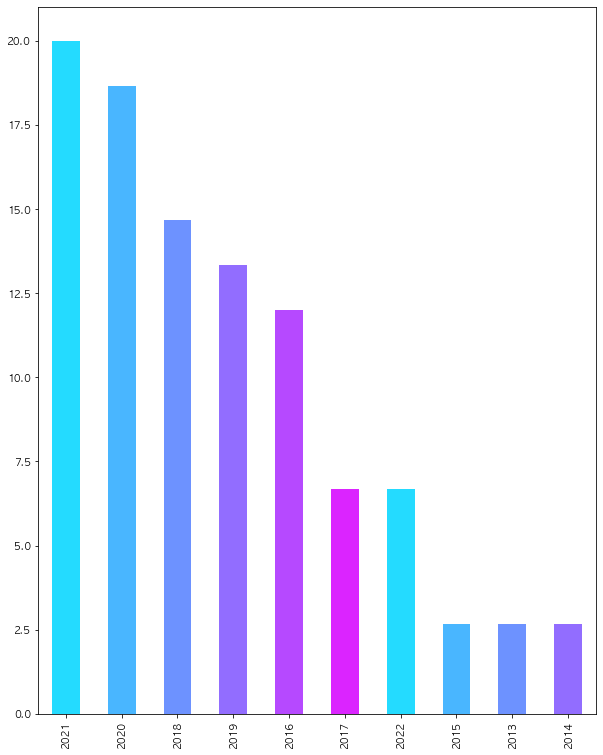

In [142]:
(net_original['year'].value_counts(normalize=True)*100).plot.bar(figsize = (10,13),color=sns.color_palette('cool'))

<AxesSubplot:xlabel='genre'>

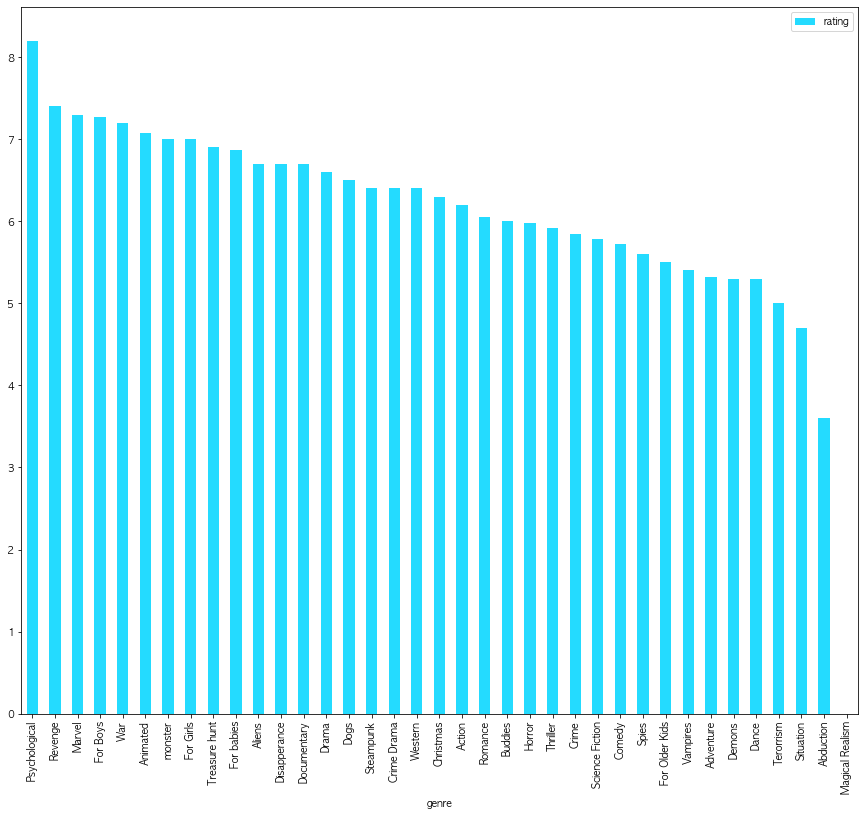

In [108]:
temp = netflix[netflix["popular_country"]=="Argentina"]
temp[['rating','genre']].groupby(['genre'],as_index = True).mean().sort_values(by = 'rating',ascending = False).plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

In [109]:
temp['genre'].unique()

array(['Action', 'Adventure', 'Animated', 'Comedy', 'Drama', 'Crime',
       'Science Fiction', 'monster', 'For babies', 'Thriller', 'War',
       'Romance', 'Buddies', 'Western', 'Dogs', 'Horror', 'Marvel',
       'Abduction', 'Terorrism', 'For Boys', 'Revenge', 'Spies',
       'Christmas', 'Demons', 'For Older Kids', 'For Girls',
       'Magical Realism', 'Aliens', 'Documentary', 'Crime Drama',
       'Treasure hunt', 'Dance', 'Situation', 'Steampunk', 'Vampires',
       'Psychological', 'Disapperance'], dtype=object)

<AxesSubplot:xlabel='genre'>

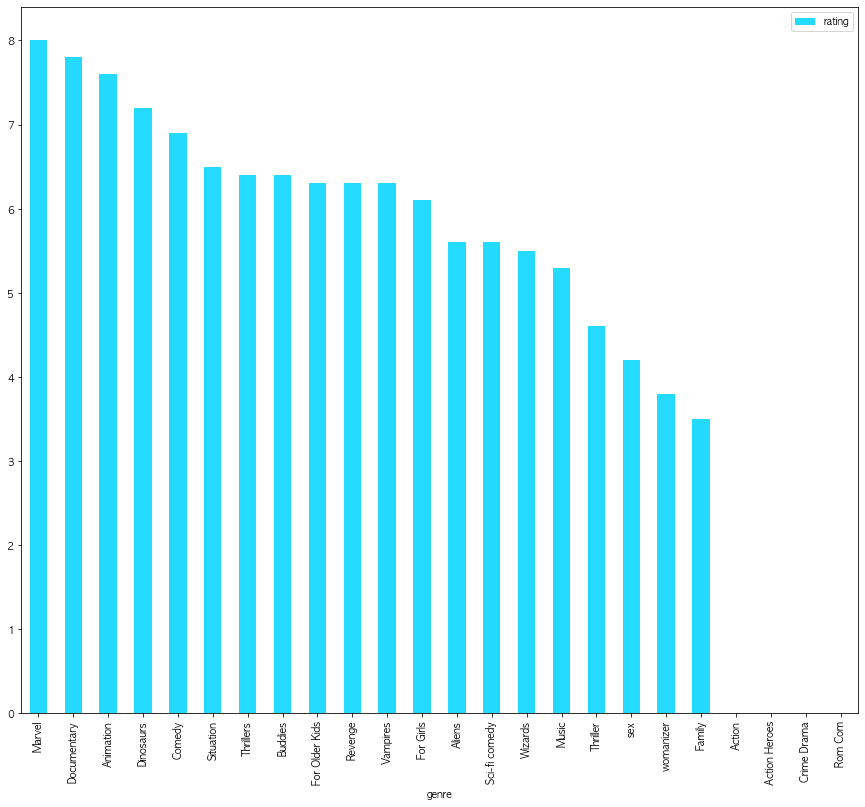

In [104]:
temp = netflix[netflix["popular_country"]=="Australia"]
temp[['rating','genre']].groupby(['genre'],as_index = True).mean().sort_values(by = 'rating',ascending = False).plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

<AxesSubplot:xlabel='genre'>

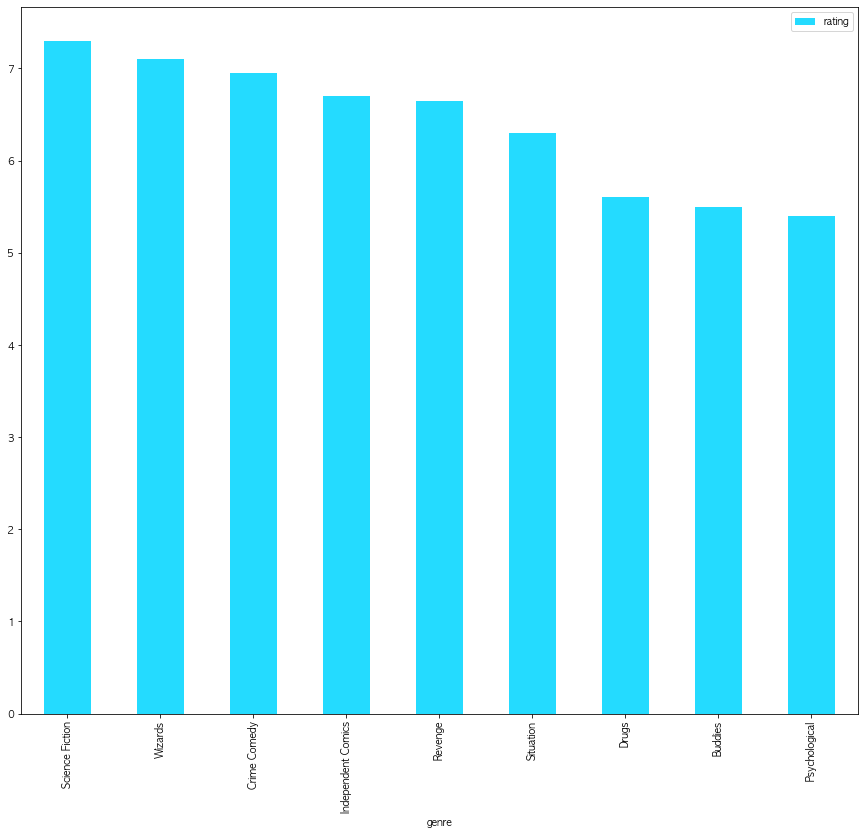

In [105]:
temp = netflix[netflix["popular_country"]=="Austria"]
temp[['rating','genre']].groupby(['genre'],as_index = True).mean().sort_values(by = 'rating',ascending = False).plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

<AxesSubplot:xlabel='genre'>

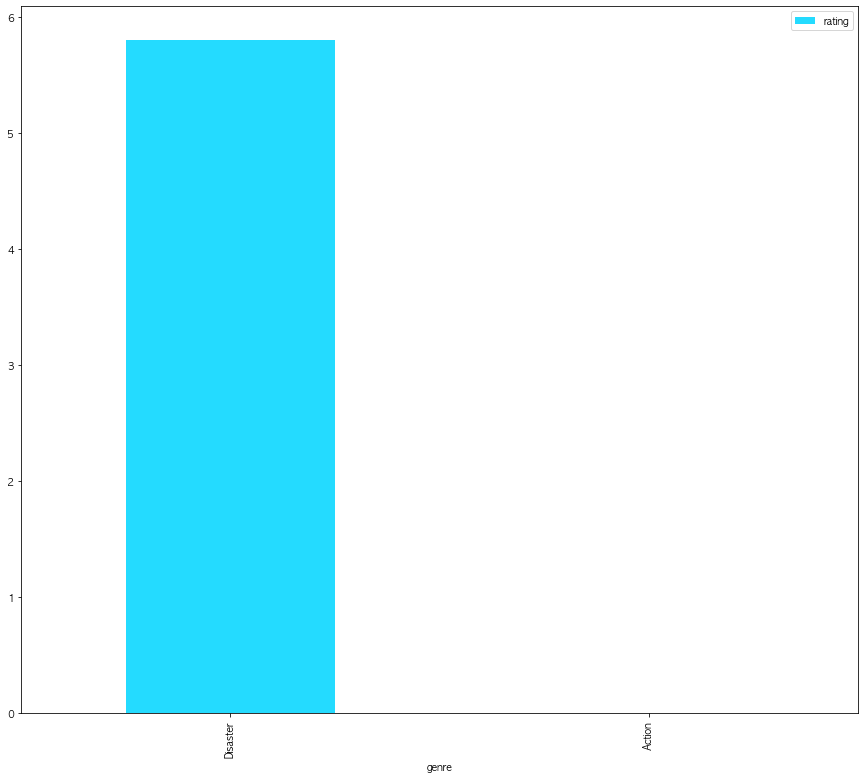

In [106]:
temp = netflix[netflix["popular_country"]=="Brazil"]
temp[['rating','genre']].groupby(['genre'],as_index = True).mean().sort_values(by = 'rating',ascending = False).plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

<AxesSubplot:xlabel='genre'>

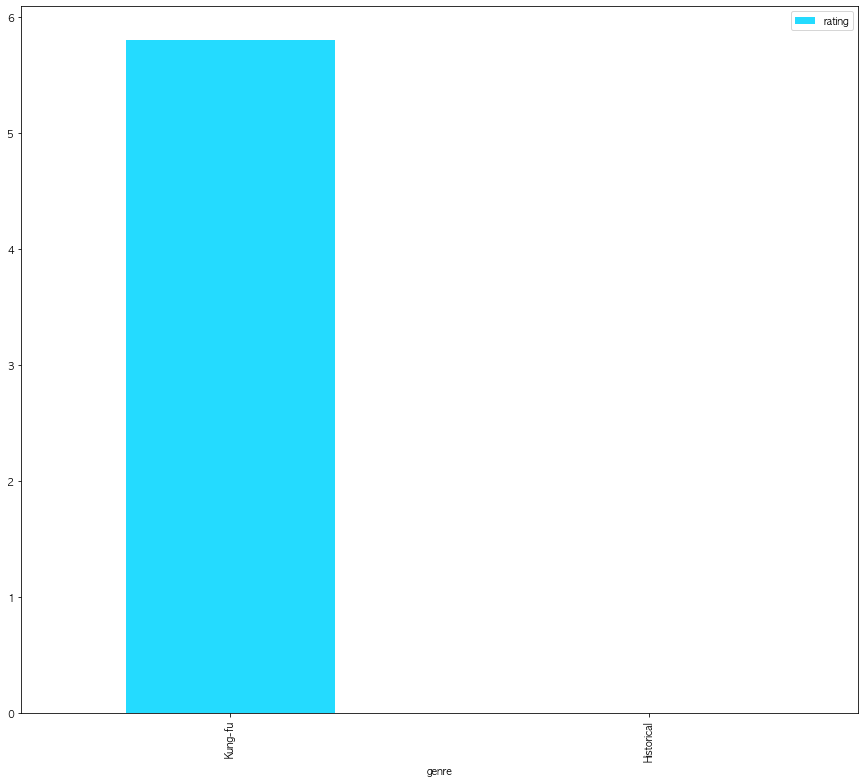

In [107]:
temp = netflix[netflix["popular_country"]=="Hong-Kong"]
temp[['rating','genre']].groupby(['genre'],as_index = True).mean().sort_values(by = 'rating',ascending = False).plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

In [79]:
netflix = pd.read_csv("netflix.csv")

In [80]:
netflix["country"].value_counts()

United States     123
France              9
United Kingdom      6
Spain               4
Germany             4
Canada              4
Russia              4
Japan               3
China               2
India               2
South Korea         2
Poland              2
Italy               2
Netherlands         2
Turkey              1
Romania             1
Australia           1
Brazil              1
South Africa        1
Belgium             1
Sweden              1
Name: country, dtype: int64

In [81]:
netflix["popular_country"].value_counts()

Argentina    127
Australia     27
Austria       11
Brazil         2
Hong-Kong      2
Poland         1
Canada         1
Chile          1
India          1
Romania        1
France         1
Belgium        1
Name: popular_country, dtype: int64

In [82]:
netflix['date'] = pd.to_datetime(netflix['date'])

In [83]:
import datetime
netflix["date_Y"] = netflix['date'].dt.year
netflix["date_M"] = netflix['date'].dt.month
netflix["date_D"] = netflix['date'].dt.day

In [84]:
netflix['rating']= netflix.rating.str.extract('(\d+.\d+)\/').astype(float)

In [93]:
netflix['rating'].describe()

count    152.000000
mean       6.163158
std        1.072701
min        1.400000
25%        5.600000
50%        6.300000
75%        6.800000
max        8.600000
Name: rating, dtype: float64

In [92]:
netflix['rating']

0      6.5
1      4.9
2      6.3
3      NaN
4      6.4
      ... 
171    5.7
172    6.1
173    5.8
174    6.8
175    6.6
Name: rating, Length: 176, dtype: float64

[Text(0, 0, 'Action'),
 Text(1, 0, 'Adventure'),
 Text(2, 0, 'Animated'),
 Text(3, 0, 'Comedy'),
 Text(4, 0, 'Drama'),
 Text(5, 0, 'Crime'),
 Text(6, 0, 'Science Fiction'),
 Text(7, 0, 'monster'),
 Text(8, 0, 'For babies'),
 Text(9, 0, 'Thriller'),
 Text(10, 0, 'War'),
 Text(11, 0, 'Romance'),
 Text(12, 0, 'Buddies'),
 Text(13, 0, 'sex'),
 Text(14, 0, 'Western'),
 Text(15, 0, 'Dogs'),
 Text(16, 0, 'Horror'),
 Text(17, 0, 'Action Heroes'),
 Text(18, 0, 'Marvel'),
 Text(19, 0, 'Abduction'),
 Text(20, 0, 'Terorrism'),
 Text(21, 0, 'For Boys'),
 Text(22, 0, 'For Older Kids'),
 Text(23, 0, 'Revenge'),
 Text(24, 0, 'Spies'),
 Text(25, 0, 'Christmas'),
 Text(26, 0, 'Documentary'),
 Text(27, 0, 'Demons'),
 Text(28, 0, 'For Girls'),
 Text(29, 0, 'Magical Realism'),
 Text(30, 0, 'Situation'),
 Text(31, 0, 'Aliens'),
 Text(32, 0, 'Crime Comedy'),
 Text(33, 0, 'Wizards'),
 Text(34, 0, 'Crime Drama'),
 Text(35, 0, 'Animation'),
 Text(36, 0, 'Vampires'),
 Text(37, 0, 'Treasure hunt'),
 Text(38, 0, '

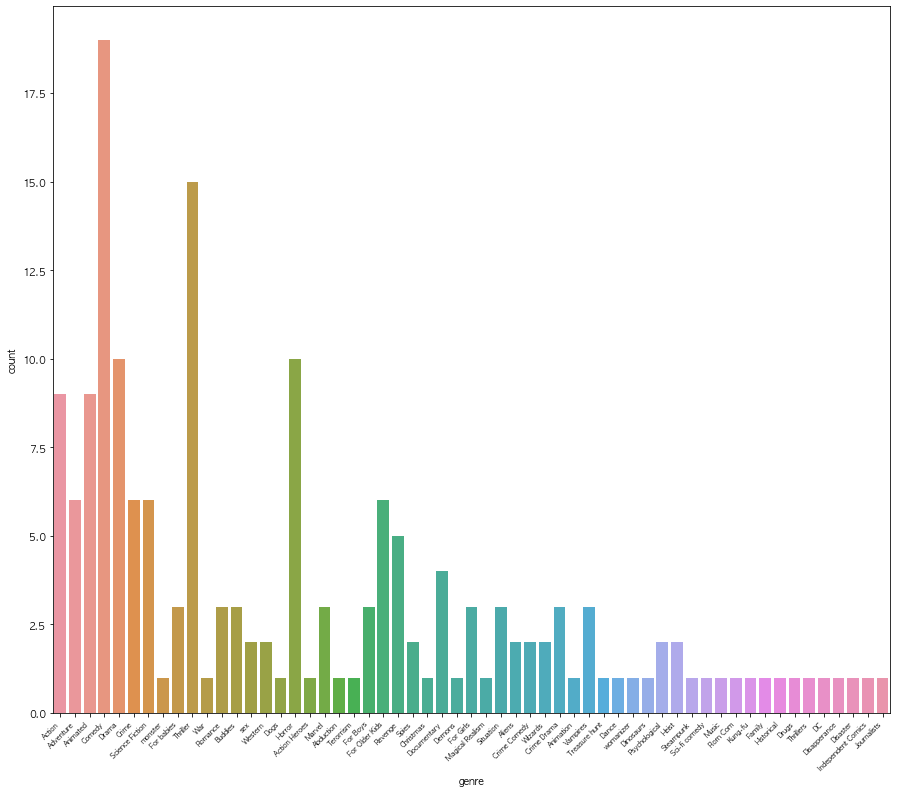

In [120]:
f,ax = plt.subplots(figsize = (15,13))
g = sns.countplot("genre",data = netflix,ax =ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize=7
                 )

<AxesSubplot:>

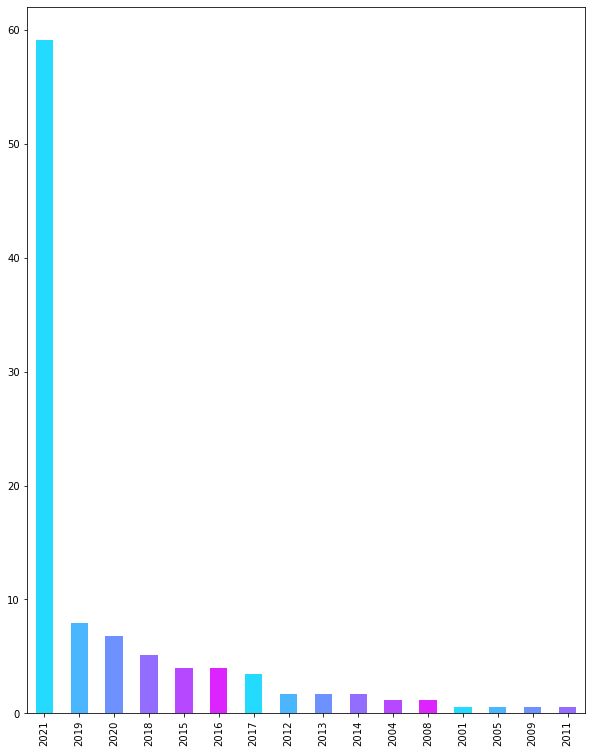

In [85]:
(netflix['date_Y'].value_counts(normalize=True)*100).plot.bar(figsize = (10,13),color=sns.color_palette('cool'))

<AxesSubplot:>

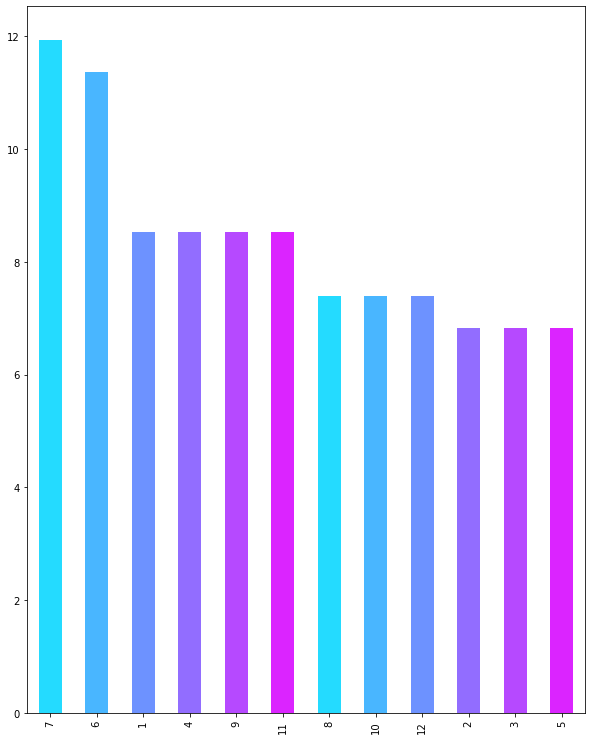

In [86]:
(netflix['date_M'].value_counts(normalize=True)*100).plot.bar(figsize = (10,13),color=sns.color_palette('cool'))

<AxesSubplot:>

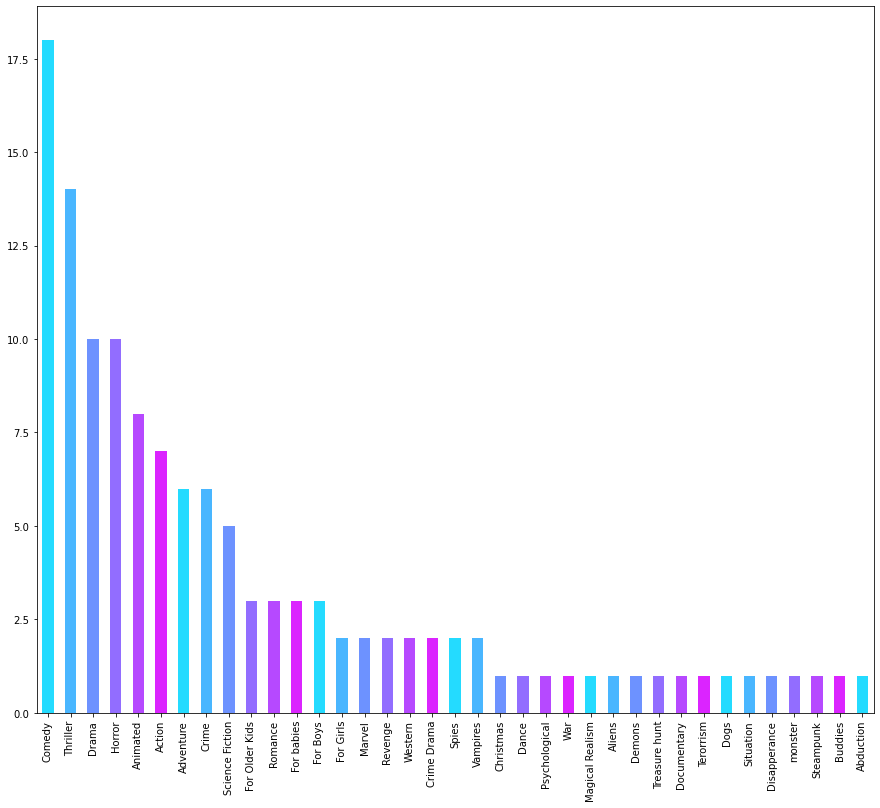

In [87]:
netflix[netflix["popular_country"]=="Argentina"]["genre"].value_counts().plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

<AxesSubplot:>

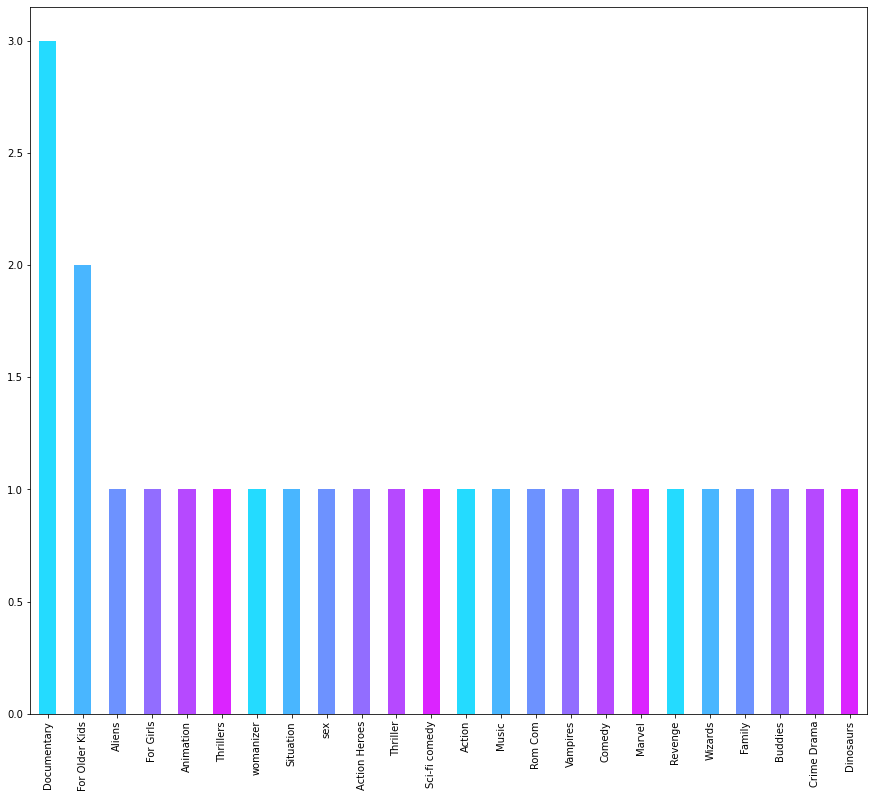

In [88]:
netflix[netflix["popular_country"]=="Australia"]["genre"].value_counts().plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

<AxesSubplot:>

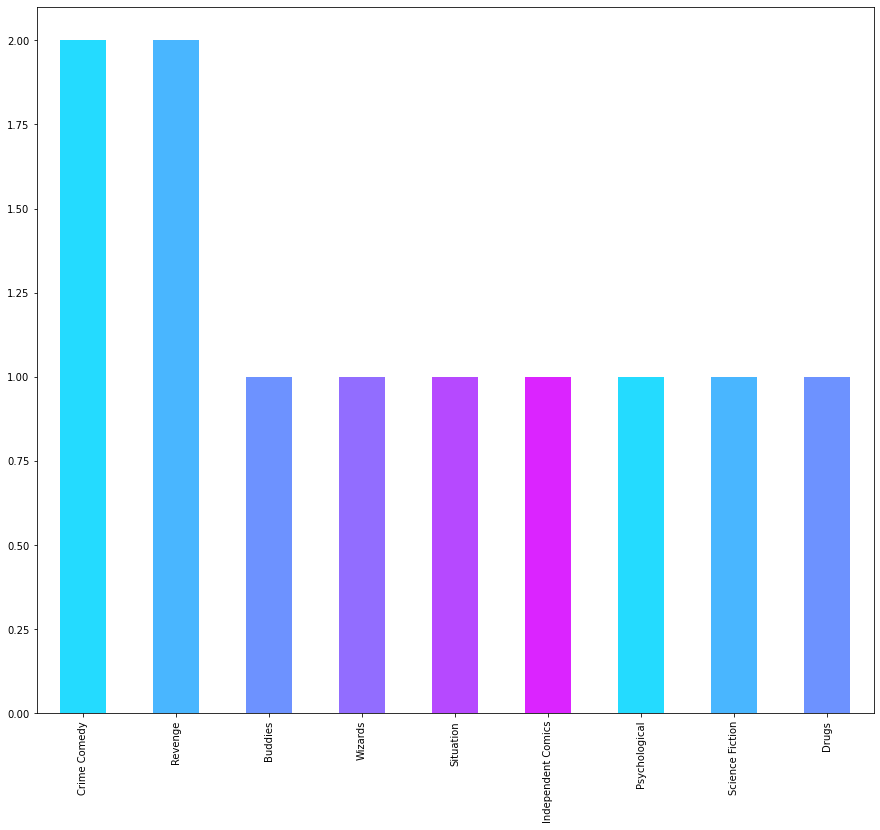

In [89]:
netflix[netflix["popular_country"]=="Austria"]["genre"].value_counts().plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

<AxesSubplot:>

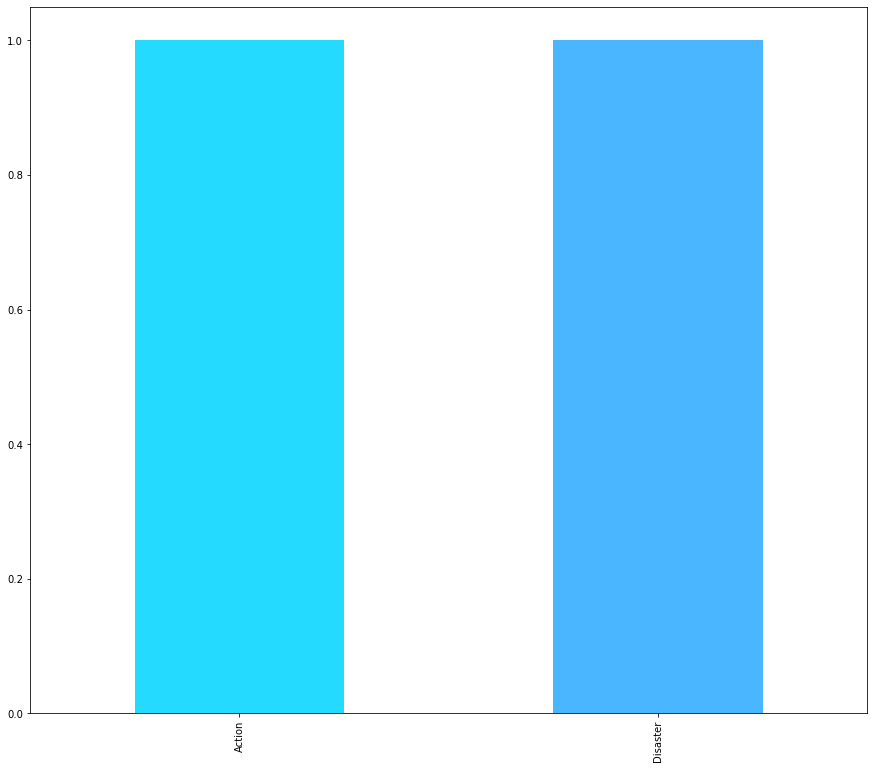

In [90]:
netflix[netflix["popular_country"]=="Brazil"]["genre"].value_counts().plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

<AxesSubplot:>

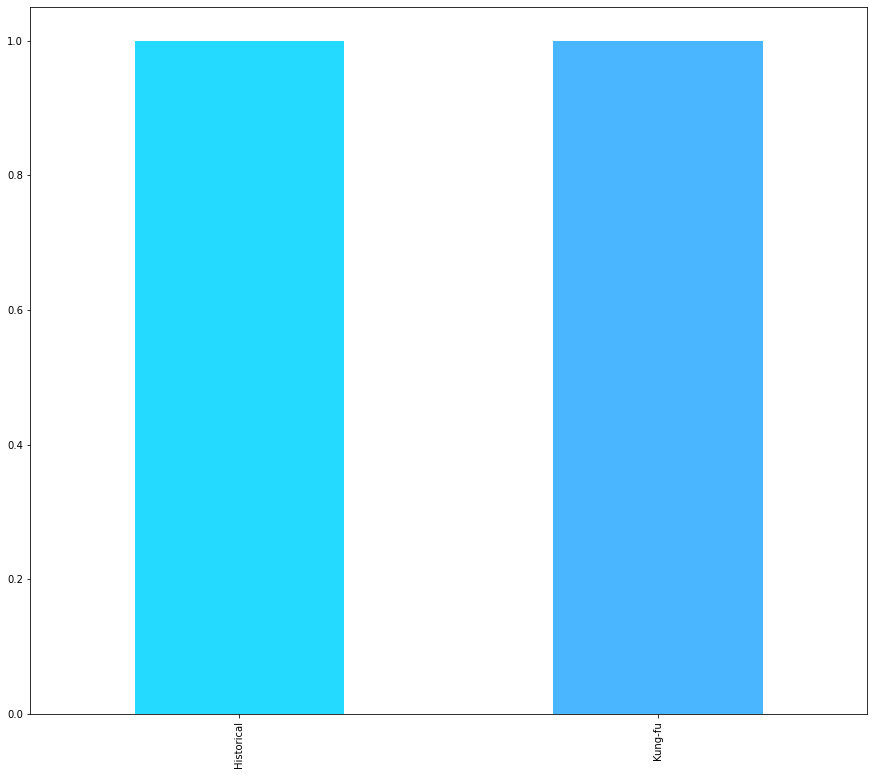

In [91]:
netflix[netflix["popular_country"]=="Hong-Kong"]["genre"].value_counts().plot.bar(figsize = (15,13),color=sns.color_palette('cool'))

### 분석 결과
#### 1. 넷플릭스 콘테츠는 국가 별로 선호하는 트렌드가 달랐으며, 
#### 2. 한국에 경우 청소년 시리즈와 스릴러 시리즈가 인기가 높았다.
#### 3. 또한 주목할 만한 점은 한국의 OTT시장이 커지면서, 넷플릭스 역시 이를 반영하여 한국에서 제작한 넷플릭스 시리즈물이 증가하고 있는 추세임을 확인하였다.
#### 4. 마지막으로 종합적인 영화 컨텐츠 트렌드는 international movie, drama, comedy가 인기를 끌고 있는 것을 확인하였다.